In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:

train_dir = "C:/Users/91944/Desktop/GurNum/train"
test_dir = "C:/Users/91944/Desktop/GurNum/val"

In [3]:

image_size = (64, 64)
batch_size = 32

In [6]:
train_data_gen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)
train_generator = train_data_gen.flow_from_directory(
train_dir,
target_size=image_size,
batch_size=batch_size,
class_mode='categorical'
)

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
test_dir,
target_size=image_size,
batch_size=batch_size,
class_mode='categorical'
)

Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.


In [7]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
32/32 [==============================] - 7s 197ms/step - loss: 1.4473 - accuracy: 0.5090 - val_loss: 0.7369 - val_accuracy: 0.7416
Epoch 2/20
32/32 [==============================] - 5s 170ms/step - loss: 0.4338 - accuracy: 0.8650 - val_loss: 0.3032 - val_accuracy: 0.8820
Epoch 3/20
32/32 [==============================] - 5s 169ms/step - loss: 0.2719 - accuracy: 0.9180 - val_loss: 0.2426 - val_accuracy: 0.9157
Epoch 4/20
32/32 [==============================] - 6s 172ms/step - loss: 0.2369 - accuracy: 0.9260 - val_loss: 0.1671 - val_accuracy: 0.9494
Epoch 5/20
32/32 [==============================] - 6s 186ms/step - loss: 0.1361 - accuracy: 0.9670 - val_loss: 0.1543 - val_accuracy: 0.9438
Epoch 6/20
32/32 [==============================] - 6s 179ms/step - loss: 0.1175 - accuracy: 0.9600 - val_loss: 0.1874 - val_accuracy: 0.9382
Epoch 7/20
32/32 [==============================] - 5s 170ms/step - loss: 0.1225 - accuracy: 0.9580 - val_loss: 0.2252 - val_accuracy: 0.9382
Epoch 

In [10]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 0.1588 - accuracy: 0.9663 - 272ms/epoch - 45ms/step

Test accuracy: 0.966292142868042


In [11]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
true_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis=1)

6/6 [==============================] - 0s 40ms/step


In [12]:
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[1 0 0 3 2 1 1 5 4 1]
 [1 2 3 0 1 1 1 0 1 6]
 [1 1 3 1 3 0 1 2 2 3]
 [2 0 0 4 4 3 3 0 1 0]
 [3 4 0 4 2 1 2 1 1 0]
 [3 2 0 2 1 1 3 2 2 2]
 [1 3 3 0 1 4 3 0 0 3]
 [2 1 2 2 1 4 1 1 3 1]
 [2 1 2 0 1 1 3 3 2 3]
 [2 3 1 0 3 2 2 4 2 1]]


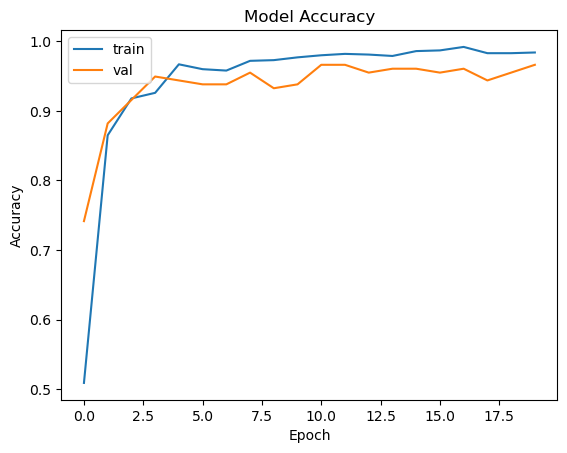

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

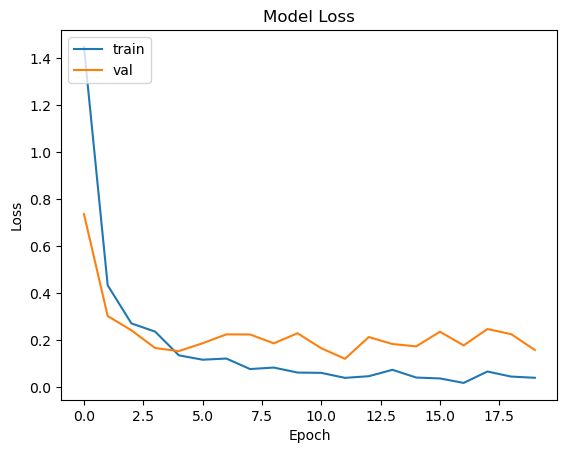

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()